# РК №2

Выполнила студентка группы ИУ5-22М Паршева Анна.

Вариант 10

# Задание

Для заданного набора данных постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения модели используйте ансамблевые модели: случайный лес и градиентный бустинг. Оцените качество модели на основе подходящих метрик качества (не менее трех метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей?

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('hotel_bookings.csv')

In [5]:
row_number = df.shape[0]
column_number = df.shape[1]

print('Данный датасет содержит {} строк и {} столбца.'.format(row_number, column_number))

Данный датасет содержит 119390 строк и 32 столбца.


In [6]:
for col in df.columns:
    null_count = df[df[col].isnull()].shape[0]
    if null_count > 0:
        column_type = df[col].dtype
        percent = round((null_count / row_number) * 100, 3)
        print('{} - {} - {}. Тип - {}'.format(col, null_count, percent, column_type))

children - 4 - 0.003. Тип - float64
country - 488 - 0.409. Тип - object
agent - 16340 - 13.686. Тип - float64
company - 112593 - 94.307. Тип - float64


In [7]:
# удаление строк с пустыми значениями children
df = df[df['children'].notna()]
# удаление столбца company
df.drop(columns=['company'], inplace=True)

In [8]:
row_number = df.shape[0]
column_number = df.shape[1]

print('После удаления пустых значений датасет содержит {} строк и {} столбец.'.format(row_number, column_number))

После удаления пустых значений датасет содержит 119386 строк и 31 столбец.


In [9]:
from sklearn.impute import SimpleImputer

imp_num = SimpleImputer(strategy='most_frequent')
df['agent'] = imp_num.fit_transform(df[['agent']])
df['country'] = imp_num.fit_transform(df[['country']])

In [10]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,9.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,9.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [11]:
column_list = []
for col in df.columns:
    column_type = df[col].dtype
    if column_type != 'object':
        column_list.append(col)    

In [12]:
column_list

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'agent',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests']

In [13]:
from sklearn.model_selection import train_test_split

clean_df = df[column_list]
df_x = clean_df.loc[:, clean_df.columns != 'is_canceled']
df_y = df['is_canceled']
train_x_df, test_x_df, train_y_df, test_y_df = train_test_split(df_x,df_y,
                                     test_size=0.3, random_state=1)

В рамках данной лабораторной работы будет решаться задача классификации. Признак классификации - is_canceled (отмена брони).

# Cлучайный лес

## Построение модели с произвольно выбранными гиперпараметрами 

In [17]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(n_estimators=1, 
                               oob_score=True, 
                               random_state=1)
tree.fit(train_x_df, train_y_df)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=True, random_state=1, verbose=0,
                       warm_start=False)

## Оценка качества модели

Для оценки качества модели были выбраны следующие метрики:
<ul>
    <li>balanced_accuracy_score;</li>
    <li>roc-кривая;</li>
    <li>матрица ошибок.</li>
</ul>
Все вышеперечисленные метрики выбраны на основании того, что они подходят для оценки моделей, решающих задачу классификации, кроме того метрики balanced_accuracy_score и roc-кривая используются при решении задач бинарной классификации, решаемой в рамках данной лабораторной работы.

In [18]:
target_t = tree.predict(test_x_df)

### Balanced accuracy score 

In [19]:
from sklearn.metrics import balanced_accuracy_score

accuracy_t = balanced_accuracy_score(test_y_df, 
                              target_t)

'Balanced accuracy score - %0.3f' % accuracy_t

'Balanced accuracy score - 0.783'

### ROC-кривая 

In [20]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Отрисовка ROC-кривой
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

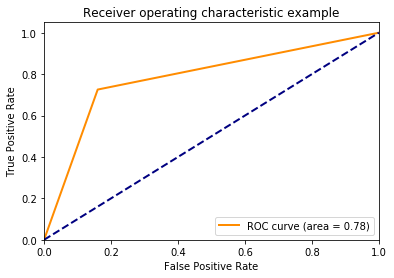

In [21]:
draw_roc_curve(test_y_df, 
               target_t, 
               pos_label=1, average='micro')

### Матрица ошибок 

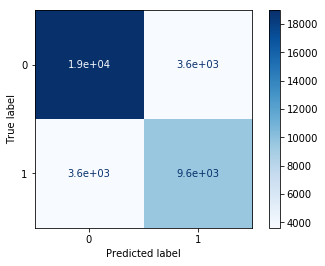

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(tree, 
                      test_x_df, 
                      test_y_df, 
                      display_labels=set(test_y_df), 
                      cmap=plt.cm.Blues)

## Подбор гиперпараметров 

In [23]:
import numpy as np
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': np.arange(1, 11, 1),
    'random_state': np.arange(1, 11, 1),
}

grid = GridSearchCV(estimator=RandomForestClassifier(),
                    param_grid=params, 
                    scoring='balanced_accuracy', 
                    cv=3, 
                    n_jobs=-1)

grid.fit(train_x_df, train_y_df)

GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

## Обучение с наилучшим гиперпараметром 

In [24]:
grid.best_estimator_.fit(train_x_df, train_y_df)
target_t_best = grid.best_estimator_.predict(test_x_df)

In [25]:
from sklearn.metrics import balanced_accuracy_score

accuracy_t_best = balanced_accuracy_score(test_y_df, 
                              target_t_best)

print('Balanced accuracy score - %0.3f' % accuracy_t)
print('Best balanced accuracy score - %0.3f' % accuracy_t_best)

Balanced accuracy score - 0.783
Best balanced accuracy score - 0.828


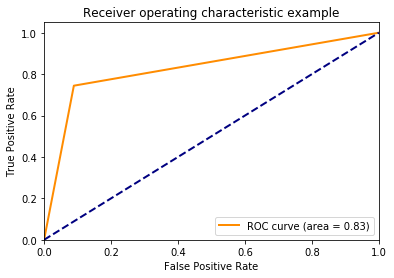

In [44]:
draw_roc_curve(test_y_df, 
               target_t_best, 
               pos_label=1, average='micro')

In [ ]:
plot_confusion_matrix(grid.best_estimator_, 
                      test_x_df, 
                      test_y_df, 
                      display_labels=set(test_y_df), 
                      cmap=plt.cm.Blues)

# Градиентный бустинг

## Построение модели с произвольно выбранными гиперпараметрами  

In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=1)
gb.fit(train_x_df, train_y_df)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Оценка качества модели

In [27]:
target_gb = gb.predict(test_x_df)

In [28]:
accuracy_gb = balanced_accuracy_score(test_y_df, 
                              target_gb)

'Balanced accuracy score - %0.3f' % accuracy_gb

'Balanced accuracy score - 0.756'

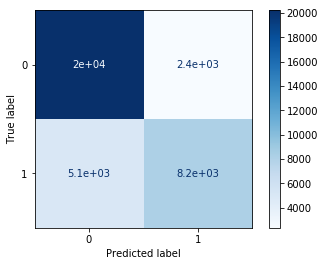

In [29]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(gb, 
                      test_x_df, 
                      test_y_df, 
                      display_labels=set(test_y_df), 
                      cmap=plt.cm.Blues)

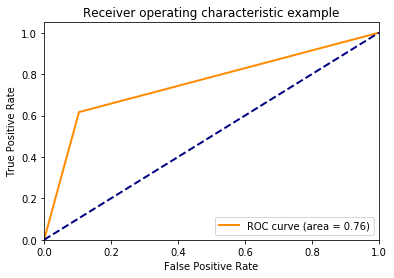

In [30]:
draw_roc_curve(test_y_df, 
               target_gb, 
               pos_label=1, average='micro')

## Подбор гиперпараметров 

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

parameters = {
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    }

grid_gb = GridSearchCV(estimator=GradientBoostingClassifier(),
                    param_grid=parameters, 
                    scoring='balanced_accuracy', 
                    cv=10,
                       n_jobs=-1
                    )

grid_gb.fit(train_x_df, train_y_df)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_...
                 

In [40]:
grid_gb.best_estimator_.fit(train_x_df, train_y_df)
target_gb_best = grid_gb.best_estimator_.predict(test_x_df)

In [41]:
from sklearn.metrics import balanced_accuracy_score

accuracy_gb_best = balanced_accuracy_score(test_y_df, 
                              target_gb_best)

print('Balanced accuracy score - %0.3f' % accuracy_gb)
print('Best balanced accuracy score - %0.3f' % accuracy_gb_best)

Balanced accuracy score - 0.756
Best balanced accuracy score - 0.775


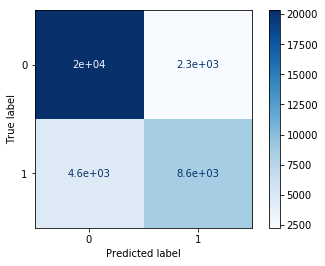

In [42]:
plot_confusion_matrix(grid_gb.best_estimator_, 
                      test_x_df, 
                      test_y_df, 
                      display_labels=set(test_y_df), 
                      cmap=plt.cm.Blues)

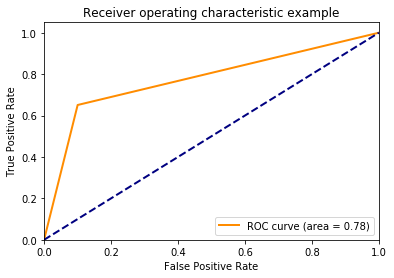

In [43]:
draw_roc_curve(test_y_df, 
               target_gb_best, 
               pos_label=1, average='micro')

# Вывод

Для решения задачи бинарной классификации на заданом наборе данных лучшей моделью является Случайный лес.